# Data exploration and cleanup

In [10]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os

sys.path.append("/Users/antonis/code/Ant-mel/legendary_game_recs/")

from utils.processing_utils import make_list_columns_to_lists, only_main_games

from sklearn.preprocessing import MultiLabelBinarizer

from google.cloud import bigquery

from datetime import datetime


In [3]:
client = bigquery.Client.from_service_account_json(os.environ.get('JSON_KEY'))

project = os.environ.get('PROJECT')
dataset = os.environ.get('DATASET')
links_table = os.environ.get('LINKS_TABLE')
game_data_table = os.environ.get('GAME_DATA_TABLE')
missed_data_table = os.environ.get('MISSED_DATA_TABLE')
test_table = 'test_table'

query_1 = f"""SELECT * FROM `legendary-game-recs.game_data_01_24.game_data`"""
query_2 = f"""SELECT * FROM `legendary-game-recs.game_data_01_24.game_data_test`"""

# query = f"""SELECT * FROM `{project}.{dataset}.{links_table}"""
query_job_1 = client.query(query_1)
results_1 = query_job_1.result()
game_data_1 = results_1.to_dataframe()

query_job_2 = client.query(query_2)
results_2 = query_job_2.result()
game_data_2 = results_2.to_dataframe()

In [4]:
game_data_1

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,url,game_id
0,World Championship Poker 2: Featuring Howard L...,2007-06-29,5,0,1,0,[],0.0,[],[],...,0,0,0,1,0,0,0,0,/games/world-championship-poker-2-featuring-ho...,21947
1,Yokai Ningen Bem: Aratanaru Tamashii No Meikyuu,1995-12-31,0,0,0,0,[],0.0,['RPG'],['Mac'],...,0,0,0,0,0,0,0,0,/games/yokai-ningen-bem-aratanaru-tamashii-no-...,281826
2,Hidden Objects: Secret Vampire Rooms - Lost Ki...,2014-07-20,0,0,0,0,[],0.0,"['Adventure', 'Puzzle']",['Mac'],...,0,0,0,0,0,0,0,0,/games/hidden-objects-secret-vampire-rooms-los...,86700
3,JumpStart Advanced Kindergarten: 2nd Grade - L...,2011-12-31,0,0,1,0,['Knowledge Adventure'],0.0,['Adventure'],['Mac'],...,0,0,0,0,0,0,0,0,/games/jumpstart-advanced-kindergarten-2nd-gra...,210151
4,House of 1000 Doors: Family Secrets - Collecto...,2014-04-16,1,0,0,1,[],0.0,"['Adventure', 'Puzzle']",['Mac'],...,0,0,0,0,1,0,0,0,/games/house-of-1000-doors-family-secrets-coll...,53196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115815,Tharsis,2016-01-11,106,1,326,17,"['Choice Provisions', 'QubicGames S.A.']",2.8,"['Adventure', 'Card & Board Game', 'Indie', 'P...","['Windows PC', 'Mac', 'Wii U', 'PlayStation 4'...",...,4,8,7,12,11,10,1,0,/games/tharsis/,15903
115816,Mighty Party,2017-03-30,7,0,0,0,[],2.4,"['Adventure', 'Card & Board Game', 'Real Time ...","['Windows PC', 'Android', 'iOS', 'Web browser']",...,0,0,1,2,0,0,0,0,/games/mighty-party/,29865
115817,Mighty Party,2017-03-30,7,0,0,0,[],2.4,"['Adventure', 'Card & Board Game', 'Real Time ...","['Windows PC', 'Android', 'iOS', 'Web browser']",...,0,0,1,2,0,0,0,0,/games/mighty-party/,29865
115818,Armello,2015-01-22,513,9,259,42,['League of Geeks'],3.2,"['Adventure', 'Card & Board Game', 'Indie', 'Q...","['Windows PC', 'Android', 'Mac', 'Linux', 'Pla...",...,2,11,45,90,73,40,16,3,/games/armello/,11260


In [5]:
game_data_2

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,url,game_id
0,Buffy the Vampire Slayer,0001-01-01 00:00:00,5,0,2,2,[],2.0,[],[],...,1,1,1,0,0,0,0,0,/games/buffy-the-vampire-slayer--1/,83903
1,Sonic and the Secret Rings,2007-02-20 00:00:00,4700,24,593,256,"['Sega', 'Sonic Team']",1.9,['Platform'],['Wii'],...,456,504,332,321,140,85,19,38,/games/sonic-and-the-secret-rings/,5167
2,The Simpsons: Tapped Out,2012-02-29 00:00:00,1100,24,23,9,"['Fox Digital Entertainment', 'EA Mobile']",2.1,"['Adventure', 'Simulator']","['Android', 'iOS']",...,75,116,71,82,27,35,12,12,/games/the-simpsons-tapped-out/,2845
3,Paper Mario: Sticker Star,2012-11-10 00:00:00,4500,42,856,303,"['Vanpool', 'Nintendo']",1.8,"['Adventure', 'RPG', 'Turn Based Strategy']",['Nintendo 3DS'],...,412,462,295,309,139,95,23,29,/games/paper-mario-sticker-star/,3350
4,Realm Royale Reforged,2018-06-05 00:00:00,1200,5,71,3,['Hi-Rez Studios'],2.0,"['Adventure', 'Shooter']","['Windows PC', 'PlayStation 4', 'Xbox One', 'N...",...,105,163,96,99,55,21,4,3,/games/realm-royale-reforged--1/,103224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,Kirby: Planet Robobot,2016-04-28 00:00:00,5600,125,1800,972,"['HAL Laboratory', 'Nintendo']",4.2,"['Adventure', 'Platform']",['Nintendo 3DS'],...,6,27,72,202,433,1032,934,785,/games/kirby-planet-robobot/,18221
2832,Marvel's Spider-Man 2,2023-10-20 00:00:00,9100,805,3000,5700,"['Sony Interactive Entertainment', 'Insomniac ...",4.2,"['Adventure', 'Brawler']",['PlayStation 5'],...,17,58,119,379,967,2189,2093,1611,/games/marvels-spider-man-2/,127044
2833,Xenoblade Chronicles,2010-06-10 00:00:00,5800,211,2200,1200,"['Nintendo', 'Monolith Soft']",4.2,"['Adventure', 'RPG']","['Wii U', 'Wii']",...,31,65,88,202,311,694,742,1228,/games/xenoblade-chronicles/,2364
2834,Half-Life 2: Episode Two,2007-10-09 00:00:00,12000,78,3400,497,"['CyberFront', 'Valve']",4.2,"['Puzzle', 'Shooter']","['Windows PC', 'Mac', 'Xbox 360', 'Linux', 'Pl...",...,14,45,77,374,796,2266,1673,1360,/games/half-life-2-episode-two/,247


In [6]:
data = pd.concat([game_data_1, game_data_2]).reset_index(drop=True)

# Exploring the data

Data had to be scraped in small batches else it failed. 

When scraped during the day, batches would only be 10k as it would crash sooner and the person scraping could take brakes inbetween for whatever reason. 

For reference - a 10k batch would take 2.5 hours

In [2]:
# set_1 = pd.read_csv('../raw_data/final_scrape_0to10k')
# set_2 = pd.read_csv('../raw_data/final_scrape_10kto40k')
# set_3 = pd.read_csv('../raw_data/final_scrape_40kto50k')
# set_4 = pd.read_csv('../raw_data/final_scrape_50kto60k')
# set_5 = pd.read_csv('../raw_data/final_scrape_60kto70k')
# set_6 = pd.read_csv('../raw_data/final_scrape_70kto80k')
# set_7 = pd.read_csv('../raw_data/final_scrape_80kto90k')
# set_8 = pd.read_csv('../raw_data/final_scrape_90kto120k')

# data = pd.concat((set_1, set_2, set_3, set_4, set_5, set_6, set_7, set_8))


In [16]:
data.shape


(118656, 27)

In [17]:
data.head()


,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,url,game_id
0,World Championship Poker 2: Featuring Howard L...,2007-06-29 00:00:00,5,0,1,0,[],0.0,[],[],...,0,0,0,1,0,0,0,0,/games/world-championship-poker-2-featuring-ho...,21947
1,Yokai Ningen Bem: Aratanaru Tamashii No Meikyuu,1995-12-31 00:00:00,0,0,0,0,[],0.0,['RPG'],['Mac'],...,0,0,0,0,0,0,0,0,/games/yokai-ningen-bem-aratanaru-tamashii-no-...,281826
2,Hidden Objects: Secret Vampire Rooms - Lost Ki...,2014-07-20 00:00:00,0,0,0,0,[],0.0,"['Adventure', 'Puzzle']",['Mac'],...,0,0,0,0,0,0,0,0,/games/hidden-objects-secret-vampire-rooms-los...,86700
3,JumpStart Advanced Kindergarten: 2nd Grade - L...,2011-12-31 00:00:00,0,0,1,0,['Knowledge Adventure'],0.0,['Adventure'],['Mac'],...,0,0,0,0,0,0,0,0,/games/jumpstart-advanced-kindergarten-2nd-gra...,210151
4,House of 1000 Doors: Family Secrets - Collecto...,2014-04-16 00:00:00,1,0,0,1,[],0.0,"['Adventure', 'Puzzle']",['Mac'],...,0,0,0,0,1,0,0,0,/games/house-of-1000-doors-family-secrets-coll...,53196


In [18]:
data.duplicated().sum()

9645

### Dealing with Duplicates

10,000 duplicates!!!

In [22]:
# Copying data before adjusting
working_data = data.copy()


In [23]:
working_data.duplicated().sum()


9645

In [148]:
working_data.drop_duplicates(subset=['game_id'],inplace=True)


In [149]:
working_data[['title']].duplicated().sum()


0

### Incorrect dtypes

- release_date - Needs to be a datetime, but not important for the model, only important for the front-end
- developers, genres, platforms - change to lists (Currently they are strings that look like lists)
- plays, platying, backlogs, wishlists, total_reviews_total_lists - 'k' needs to be removed to make them all int


In [33]:
# Adjusting 'fake' str variable that look like lsist, to real lists
string_to_list_colums = ['developers','genres','platforms']
working_data[string_to_list_colums] = make_list_columns_to_lists(working_data, string_to_list_colums)

In [58]:
working_data.shape

(105193, 27)

#### Removing games with release date 0001-01-01
That was the assigned release date for games with a release date set to TBC on Backlogged/IGDB

In [62]:
working_data['release_date'] = pd.to_datetime(working_data['release_date'], errors='coerce')

<AxesSubplot: >

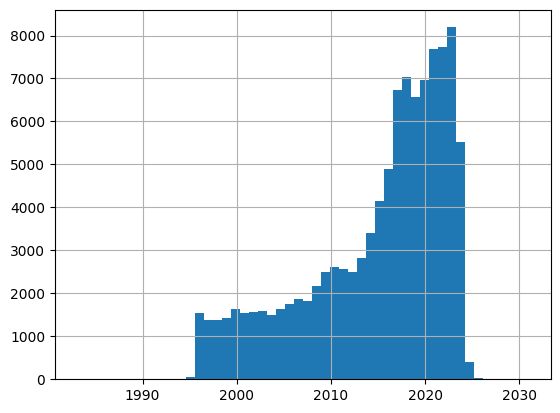

In [75]:
working_data[~working_data['release_date'].isna()]['release_date'].hist(bins=50)

In [76]:
year_1_mask = working_data['release_date'].isna()

games_that_exist = working_data[~year_1_mask]

games_that_exist.shape

(105173, 27)

## Dealing with non-main games

DLC, expansions and mods should not be part of the video game recomendations (but perhaps something we can do in future❓)

In [85]:
# removing main games and dropping categories column
# as its no longer useful

only_main_games_df = only_main_games(games_that_exist)


In [86]:
only_main_games_df.shape


(89618, 26)

### Cleaning our y

avg_reviews is currently our y

In the dataset, 64404 games do not have an avg_review, which means they have been reviewd less than 3 times. 

We are happy to remove these games as we choose not to recommend games that we assume have not been played by humans.

In [56]:
# main_games_dattime = change_to_datetype(only_main_games, 'release_date')


We need to seperate upcoming games so we can make recommend them to users - these would otherwise be removed as they cannot have reviews, and we drop games with a review score of 0

In [90]:
upcoming_mask = only_main_games_df['release_date'] > pd.Timestamp(datetime(2024, 1, 24))
upcoming_games = only_main_games_df[upcoming_mask]
released_games = only_main_games_df[~upcoming_mask]


In [91]:
upcoming_games.shape, released_games.shape

((686, 26), (88932, 26))

In [112]:
games_that_exist_with_reviews = released_games[released_games['avg_review'] > 0].copy()
games_that_exist_with_reviews.shape


(34566, 26)

### Creating final dataset

In [113]:
all_data = pd.concat((upcoming_games, games_that_exist_with_reviews))


## Visualising the data

### Numeric Data

Text(0.5, 1.0, 'Games released per year')

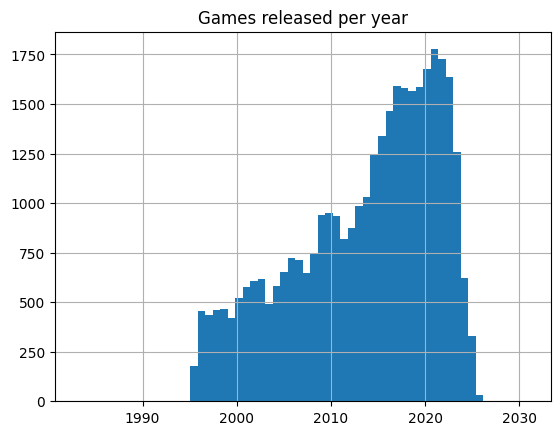

In [114]:
all_data['release_date'].hist(bins=60)
plt.title("Games released per year")


Text(0.5, 1.0, 'Distribution of avg_review scores')

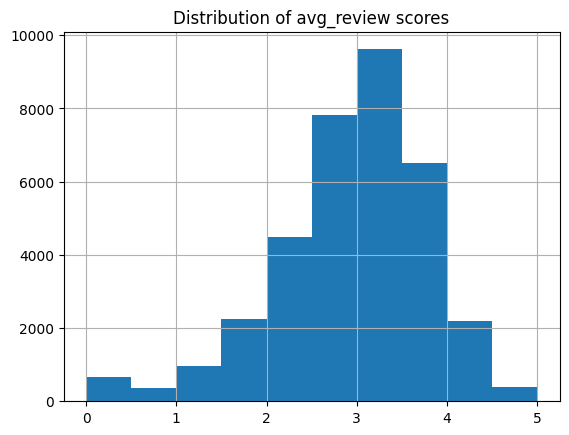

In [115]:
all_data['avg_review'].hist()
plt.title('Distribution of avg_review scores')


Text(0.5, 1.0, 'Total Reviews')

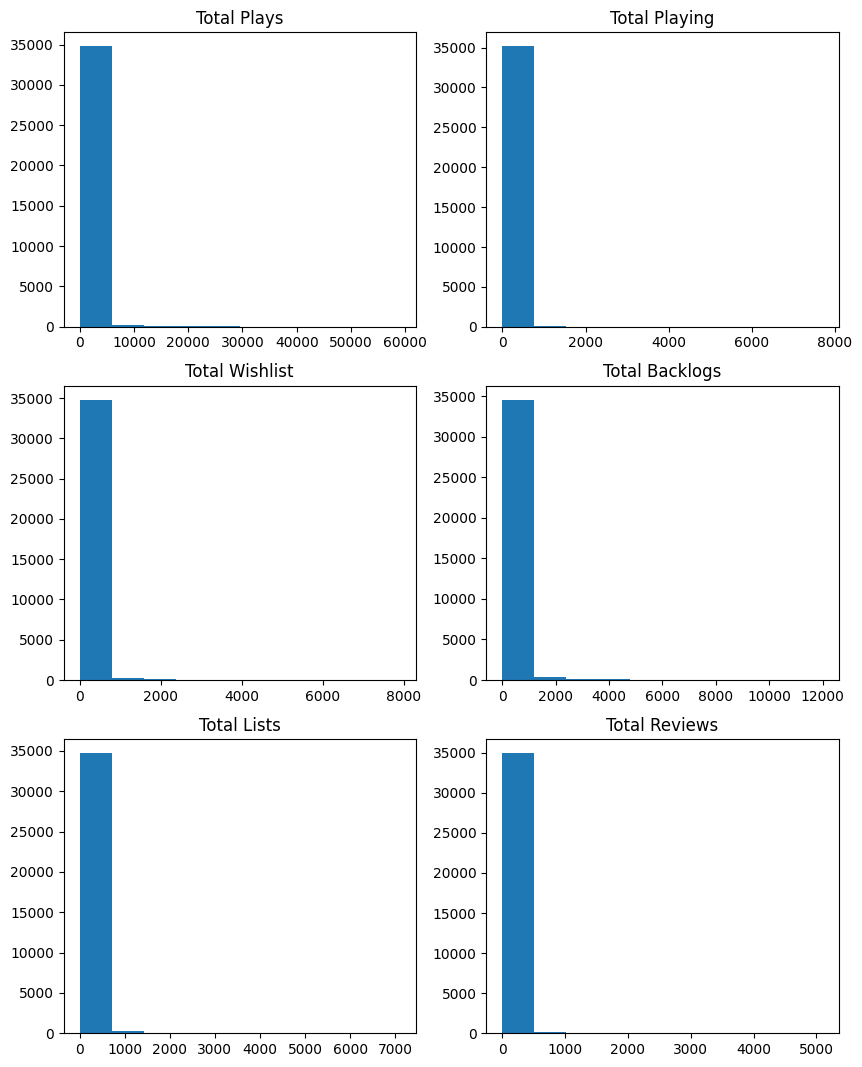

In [116]:
#Visualising numeric features
fig, axs = plt.subplots(3,2, figsize=(10, 13))

axs[0,0].hist(all_data['plays'])
axs[0,0].set_title('Total Plays')

axs[0,1].hist(all_data['playing'])
axs[0,1].set_title('Total Playing')

axs[1,0].hist(all_data['wishlist'])
axs[1,0].set_title('Total Wishlist')

axs[1,1].hist(all_data['backlogs'])
axs[1,1].set_title('Total Backlogs')

axs[2,0].hist(all_data['total_lists'])
axs[2,0].set_title('Total Lists')

axs[2,1].hist(all_data['total_reviews'])
axs[2,1].set_title('Total Reviews')


There are many games that have a 0 value or near 0 value, with few having values in the thousands. 

This will skew the model, and bias it towards popular games

Best option will be to use Yeo-Johnson Scaling - but they all look the same. How correlated are they?

Text(0.5, 1.0, '5')

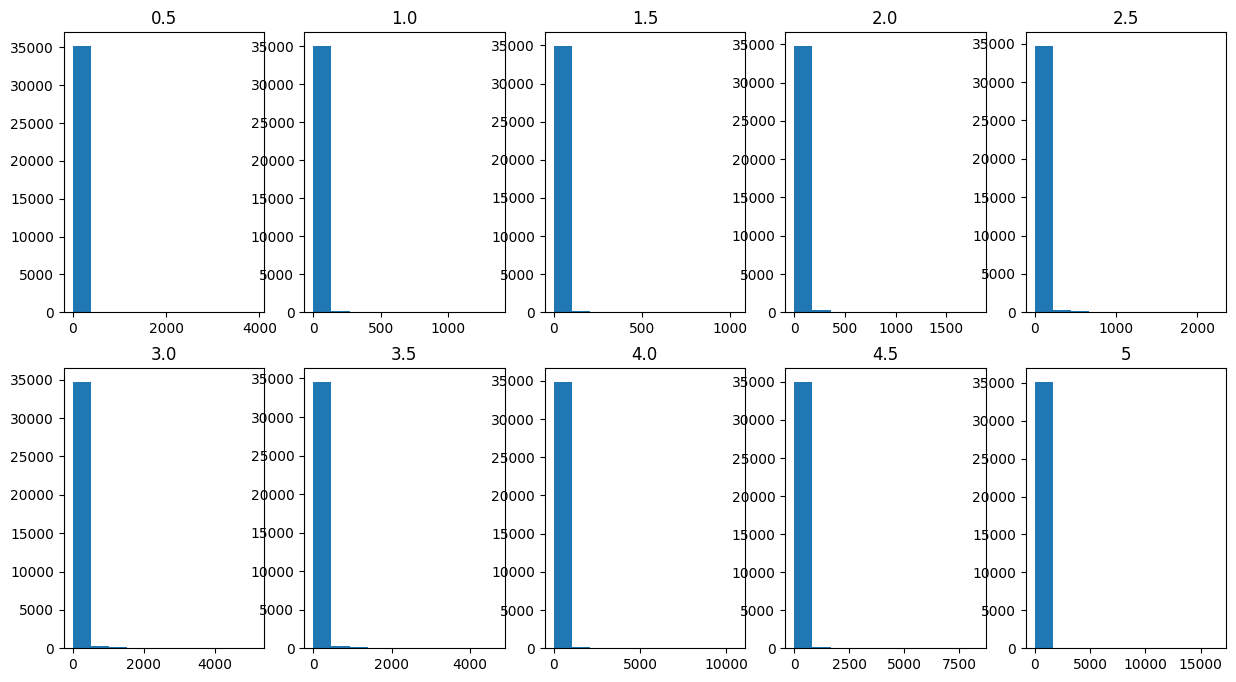

In [117]:
# Graphing the ratings_ columns

fig, axs = plt.subplots(2, 5, figsize=(15, 8))

axs[0,0].hist(all_data['ratings_zero_five'])
axs[0,0].set_title('0.5')

axs[0,1].hist(all_data['ratings_one_zero'])
axs[0,1].set_title('1.0')

axs[0,2].hist(all_data['ratings_one_five'])
axs[0,2].set_title('1.5')

axs[0,3].hist(all_data['ratings_two_zero'])
axs[0,3].set_title('2.0')

axs[0,4].hist(all_data['ratings_two_five'])
axs[0,4].set_title('2.5')

axs[1,0].hist(all_data['ratings_three_zero'])
axs[1,0].set_title('3.0')

axs[1,1].hist(all_data['ratings_three_five'])
axs[1,1].set_title('3.5')

axs[1,2].hist(all_data['ratings_four_zero'])
axs[1,2].set_title('4.0')

axs[1,3].hist(all_data['ratings_four_five'])
axs[1,3].set_title('4.5')

axs[1,4].hist(all_data['ratings_five_zero'])
axs[1,4].set_title('5')


### Numeric Correlation

In [121]:
numeric_columns = ['plays', 'playing', 'backlogs', 'wishlist', 'total_reviews', 'total_lists']

In [133]:
corr_matrix = games_that_exist_with_reviews[numeric_columns].corr()
corr_matrix

,plays,playing,backlogs,wishlist,total_reviews,total_lists
plays,1.000000,0.632576,0.792067,0.667691,0.918320,0.904680
playing,0.632576,1.000000,0.660060,0.721238,0.806221,0.699726
backlogs,0.792067,0.660060,1.000000,0.893658,0.813380,0.910830
wishlist,0.667691,0.721238,0.893658,1.000000,0.792204,0.865084
total_reviews,0.918320,0.806221,0.813380,0.792204,1.000000,0.926068
total_lists,0.904680,0.699726,0.910830,0.865084,0.926068,1.000000


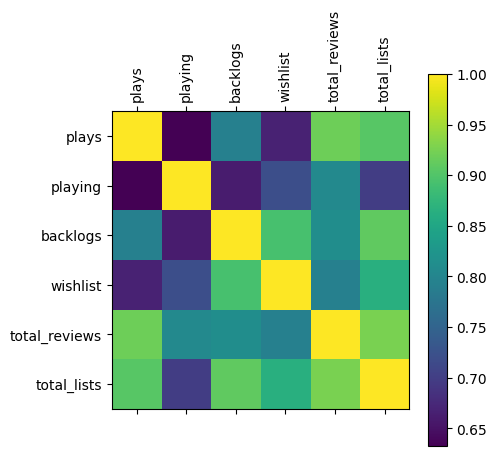

In [134]:
plt.matshow(corr_matrix)
plt.colorbar()

plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation='vertical')
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns);


In order to predict upcoming games, it would be good to drop total_reviews, plays and playing - these will not be applicable to upcoming games. 

total_lists correlates highly with all features - for simplicity we will run the model with only this feature.

## Ratings_ correlaton check

Checking the ratings_ columns to see if they are useful

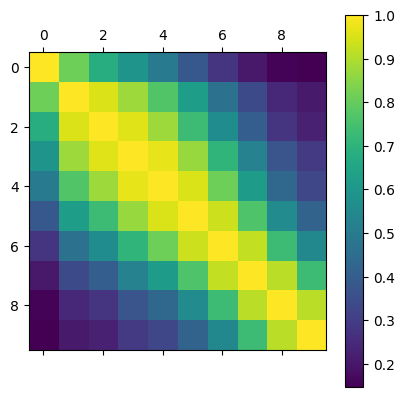

In [138]:
# Creating ratings columns
ratings_columns = ['ratings_zero_five',
       'ratings_one_zero', 'ratings_one_five', 'ratings_two_zero',
       'ratings_two_five', 'ratings_three_zero', 'ratings_three_five',
       'ratings_four_zero', 'ratings_four_five', 'ratings_five_zero']

plt.matshow(games_that_exist_with_reviews[ratings_columns].corr())
plt.colorbar()


The ratings_ features could have been great for recomending current games - but we would have only used 0.5 and 5 star reviews as features, as they are the least correlated with each other. 

However, this feature should be missing for upcoming games, and will be excluded for now. 

NOTE: some unreleased games have ratings, so we assume its from a bug on Backlogged

### Categorical Data

In [29]:
categorical_columns = ['developers', 'genres', 'platforms']


In [145]:
# Encoding the category
mlb_devs = MultiLabelBinarizer()
transformed_devs = mlb_devs.fit_transform(games_that_exist_with_reviews['developers'])

# Creating and sorting dataframe
dev_ohe_colums = pd.DataFrame(transformed_devs, columns=mlb_devs.classes_)
popular_devs = pd.DataFrame(dev_ohe_colums.sum().sort_values(ascending=False))
popular_devs.head(50)


,0
,5603
Nintendo,716
Sony Computer Entertainment,468
Konami,437
Sega,431
Inc.,418
Electronic Arts,385
Capcom,363
Square Enix,345
Bandai Namco Entertainment,306


In [146]:
# Encoding the category
mlb_plats = MultiLabelBinarizer()
transformed_plats = mlb_plats.fit_transform(games_that_exist_with_reviews['platforms'])

# Creating and sorting dataframe
plats_ohe_colums = pd.DataFrame(transformed_plats, columns=mlb_plats.classes_)
popular_plats = pd.DataFrame(plats_ohe_colums.sum().sort_values(ascending=False))
popular_plats.head(25)


,0
Windows PC,20924
Mac,6318
PlayStation 4,5118
Nintendo Switch,4927
Xbox One,4150
iOS,3987
Linux,3882
Android,3469
Web browser,2067
PlayStation 3,1981


In [147]:
# Encoding the category
mlb_genre = MultiLabelBinarizer()
transformed_genre = mlb_genre.fit_transform(games_that_exist_with_reviews['genres'])

# Creating and sorting dataframe
genre_ohe_colums = pd.DataFrame(transformed_genre, columns=mlb_genre.classes_)
popular_genre = pd.DataFrame(genre_ohe_colums.sum().sort_values(ascending=False))
popular_genre.head(25)


,0
Adventure,12604
Indie,11777
RPG,6022
Simulator,5548
Puzzle,5215
Strategy,4979
Shooter,4379
Platform,3817
Arcade,3472
Sport,2457


Developers and platforms will create clustrers in our recommendation model that are too similar. 

Genre works well, as games can have multiple which could create more divers clusters. We will use all 25 for the baselne model then itterate from there

In [34]:
#Save Data as JSON
final_data.to_json("../raw_data/final_data", orient='records')


# Conclusion summary

## Features to use in model
### Numeric
- total_lists
- avg_review - target

### Categorical
- genres - one hot encoded

## Features to use in filtering
- release_date
- platforms
- genres

## Features to ignore, and why
- title - no value
- plays, playing, backlogs, total_reviews, ratings_* - these three features are only for released games and will throw bias unreleased games into their own cluster
- developers - no value
- description - no value, but considering NLP after baseline for more precise genres
- main - no value, as only indicates the main game
- url + game_id - no value for model. game_id will help us get more data from an API